# Caos I: la ecuación de Lorenz

## **Ejercicio 1)** Importando librerías

**1)** Importe las librerías `numpy` para operar con arrays, `scipy.signal` para analizar señales de datos y `matplotlib.pyplot` para graficar.

**2)** Suba el archivo "libreria" `ode.py` que fabricó en el práctico 4), e impórtelo.

In [1]:
# 1.1)

import numpy as np
import scipy.signal as sgn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.signal import find_peaks, savgol_filter

In [2]:
# 1.2)

import ode

## Ejercicio 2)

Considere el sistema de Ecuaciones Diferenciales Ordinarias de Lorenz

\begin{equation}
\begin{aligned}
\frac{dx}{dt} & = & s(y-x) \\
\frac{dy}{dt} & = & rx-y-xz \\
\frac{dz}{dt} & = & xy-bz
\end{aligned}
\end{equation}

Sea $p=(s,r,b)$ el vector de parámetros.

**1)**
Usando el método de Runge-Kutta de orden 4, resuelva la ODE para las siguientes elecciones de las condiciones iniciales, de los parámetros y del intervalo de tiempo de integración:

&nbsp; &nbsp; **i)** $(x(0),y(0),z(0))=(1,0.5,0.1)$, $p=(10,0.5,8/3)$ y $t\in [0,10]$.

&nbsp; &nbsp; **ii)** $(x(0),y(0),z(0))=(1,0.5,0.1)$, $p=(10,10,8/3)$ y $t\in [0,20]$.

&nbsp; &nbsp; **iii)** $(x(0),y(0),z(0))=(1,0.5,0.1)$, $p=(10,28,8/3)$ y $t\in [0,50]$

**2)** Para cada caso calculado en el inciso **1)**, grafique, en un mismo gráfico, las curvas en función del tiempo $x(t)$ vs $t$, $y(t)$ vs $t$ y $z(t)$ vs $t$.

**3)**
Para cada caso calculado en el inciso **1)**, grafique paramétricamente en función del tiempo, y en 3 dimensiones, el vector que describe la trayectoria de la solución, i.e. grafique $(x(t),y(t),z(t))$ vs $t$.

In [3]:
# 2.1)

def f_lorenz(x, t, p):
    s, r, b = p
    dxdt = s * (x[1] - x[0])
    dydt = r * x[0] - x[1] - x[0] * x[2]
    dzdt = x[0] * x[1] - b * x[2]
    return np.array([dxdt, dydt, dzdt])

In [4]:
def integrar_rk4(f, x0, t, h, p):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    
    for i in range(n - 1):
        x[i + 1] = ode.rk4(f, x[i], t[i], h, p)
    
    return x

In [5]:
# 2.1.i)

s = 10.0
r = 0.5
b = 8.0/3.0

p = np.array([s,r,b])

x0 = 1.0
y0 = 0.5
z0 = 0.1

r0 = np.array([x0,y0,z0])

t_inicial = 0
t_final = 10
dt = 0.01

nump = int((t_final-t_inicial)/dt)
t, r = ode.integrador_ode(ode.rk4, f_lorenz, r0, t_inicial, t_final, nump, p)

t1 = t
x1, y1, z1 = r

In [6]:
# 2.1.ii)

s = 10.0
r = 10.0
b = 8.0/3.0

p = np.array([s,r,b])

x0 = 1.0
y0 = 0.5
z0 = 0.1

r0 = np.array([x0,y0,z0])

t_inicial = 0
t_final = 20
dt = 0.01

nump = int((t_final-t_inicial)/dt)
t, r = ode.integrador_ode(ode.rk4, f_lorenz, r0, t_inicial, t_final, nump, p)

t2 = t
x2, y2, z2 = r

In [7]:
# 2.1.iii)

s = 10.0
r = 28.0
b = 8.0/3.0

p = np.array([s,r,b])

x0 = 1.0
y0 = 0.5
z0 = 0.1

r0 = np.array([x0,y0,z0])

t_inicial = 0
t_final = 50
dt = 0.01

nump = int((t_final-t_inicial)/dt)
t, r = ode.integrador_ode(ode.rk4, f_lorenz, r0, t_inicial, t_final, nump, p)

t3 = t
x3, y3, z3 = r

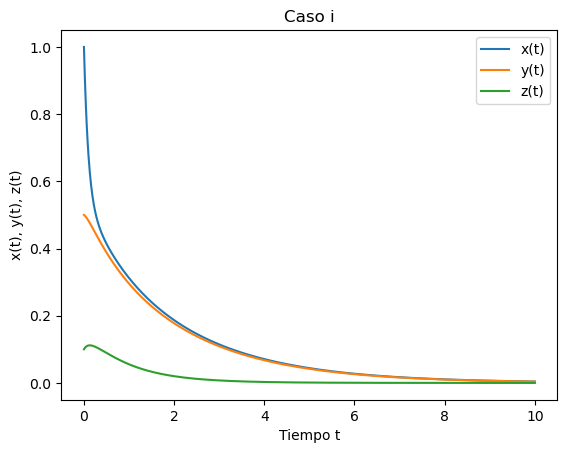

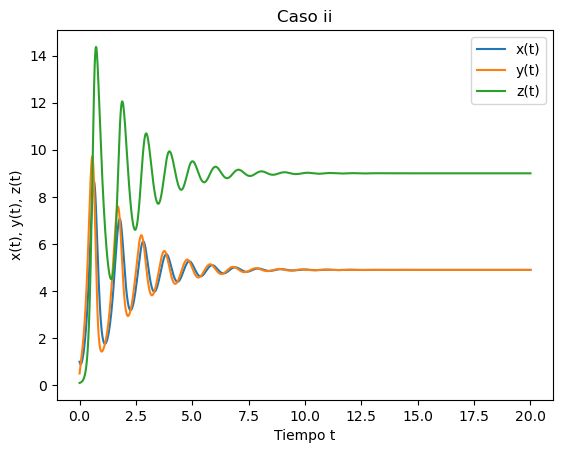

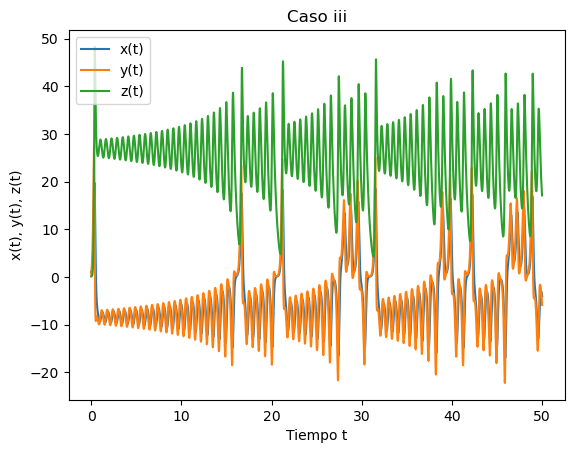

In [8]:
# 2.2)

def graficar_2d(t, x, y, z, titulo):
    plt.plot(t, x, label='x(t)') #, color='blue')
    plt.plot(t, y, label='y(t)') #, color='orange')
    plt.plot(t, z, label='z(t)') #, color='green')
    plt.title(titulo)
    plt.xlabel('Tiempo t')
    plt.ylabel('x(t), y(t), z(t)')
    plt.legend()
    plt.show()

graficar_2d(t1, x1, y1, z1, 'Caso i')
graficar_2d(t2, x2, y2, z2, 'Caso ii')
graficar_2d(t3, x3, y3, z3, 'Caso iii')

In [9]:
def graficar_3d(x, y, z, titulo):
    fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, 
                                       mode='lines', 
                                       line=dict(color='#1f77b4', width=2))])
    
    fig.update_layout(title=titulo,
                      scene=dict(xaxis_title='x(t)',
                                 yaxis_title='y(t)',
                                 zaxis_title='z(t)'),
                      width=500, height=500)
    
    fig.show()

graficar_3d(x1, y1, z1, 'Caso i')
graficar_3d(x2, y2, z2, 'Caso ii')
graficar_3d(x3, y3, z3, 'Caso iii')


## Ejercicio 3)

**1)** Repita el caso **1.iii)** del ejercicio **2)**, para $t\in [0,300]$, y eliminando el transiente que se observa antes de "converger" al atractor.

**2)** Identifique los máximos locales de la curva $z(t)$ obtenida en el inciso **1)**, y enumérelos como $z_1,z_2,...,z_i,...,z_n$.

**3)** Grafique $z_{i+1}$ vs $z_i$ para todo $i\in\{1,2,...,n-1\}$.

In [10]:
# 3.1)

s = 10.0
r = 28.0
b = 8.0/3.0

p = np.array([s,r,b])

r0 = np.array([1.0, 1.0, 1.0])

t_inicial = 0
t_final = 300
dt = 0.01

n_pasos = int((t_final-t_inicial)/dt)
t, r = ode.integrador_ode(ode.rk4, f_lorenz, r0, t_inicial, t_final, n_pasos, p)

t_transiente = 50
t4 = t[t_transiente:]
x4 = r[0][t_transiente:]
y4 = r[1][t_transiente:]
z4 = r[2][t_transiente:]

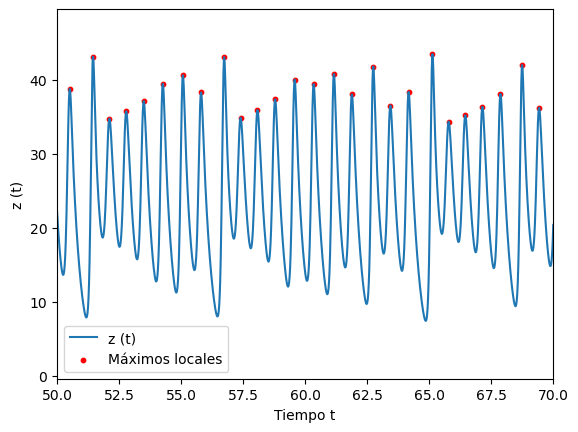

In [11]:
# 3.2)

maximos, _ = find_peaks(z4)

plt.plot(t4, z4, label='z (t)')
plt.scatter(t4[maximos], z4[maximos], color='red', s=10, label='Máximos locales')  
plt.xlim(50, 70)
plt.xlabel('Tiempo t')
plt.ylabel('z (t)')
plt.legend()
plt.show()

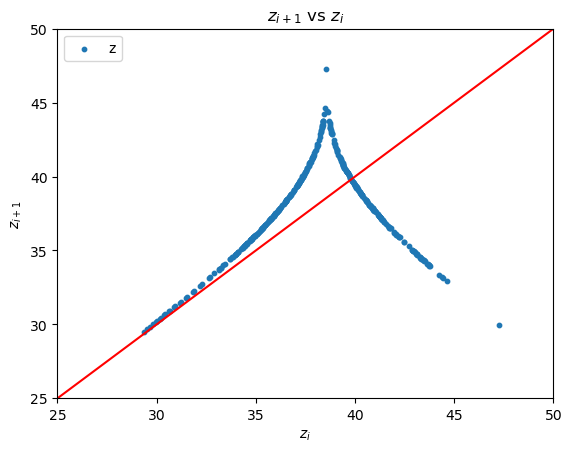

In [12]:
# 3.3)

z_max = z4[maximos]

z_i = z_max[:-1]
z_i_1 = z_max[1:]

#t = t4; z = z4
#tmaxs = [t[i] for i in range(1, len(z)-1) if z[i]>z[i-1] and z[i]>z[i+1]]
#zmaxs = [z[i] for i in range(1, len(z)-1) if z[i]>z[i-1] and z[i]>z[i+1]]
#plt.scatter(zmaxs[:-1], zmaxs[1:], label='z', linestyle='-')

plt.scatter(z_i, z_i_1, label='z', s=10, linestyle='-')
plt.title('$z_{i+1}$ vs $z_i$')
plt.xlabel('$z_i$')
plt.ylabel('$z_{i+1}$')
plt.plot([0,50], [0,50], c='r')
plt.xlim(25,50)
plt.ylim(25,50)
plt.legend()
plt.show()

## Ejercicio 4)

**1)** Con la intención de imitar un set de datos, agregue ruido Gaussiano de varianza $\sigma^2=1$ a la curva $z(t)$ vs $t$ generada en el inciso **1)** del ejercicio **3)**. Llamaremos a esta nueva curva $\tilde{z}(t)$ vs $t$. Grafíquela.

**2)** Utilice algún algoritmo de suavizado de curvas (ver función `savgol_filter` de la librería `scipy.signal`) para suavizar $\tilde{z}(t)$ vs $t$. Llame $\hat{z}(t)$ vs $t$ a la curva suavizada.

**3)** Utilice la curva suavizada del inciso **2)** para identificar los tiempos $\hat{t}_1$,$\hat{t}_2$,...,$\hat{t}_n$ en los cuales ocurre los máximos locales $\hat{z}_1=\hat{z}(\hat{t}_1)$, $\hat{z}_2=\hat{z}(\hat{t}_2)$, ...,$\hat{z}_n=\hat{z}(\hat{t}_n)$ correspondientes.

Calcule además los valores de la curva sin suavizar en dichos tiempos, i.e. calcule $\tilde{z}_1=\tilde{z}(\hat{t_1})$, $\tilde{z}_2=\tilde{z}(\hat{t_2})$, ..., $\tilde{z}_n=\tilde{z}(\hat{t_n})$.

**4)** Grafique la curva suavizada $\tilde{z}(t)$ vs $t$.

Agregue al gráfico los máximos $(\tilde{z}_i,\hat{t}_i)$ con puntos azules, y los máximos $(\hat{z}_i,\hat{t}_i)$ con puntos rojos.

Que observa?

**5)** Grafique $\tilde{z}_{i+1}$ vs $\tilde{z}_i$ para todo $i\in\{1,2,...,n-1\}$.

**6)** Grafique $\hat{z}_{i+1}$ vs $\hat{z}_i$ para todo $i\in\{1,2,...,n-1\}$.

**7)** Comparando los resultados de los incisos **5)** y **6)** con los del gráfico del inciso **3)** del ejercicio **3)**.

Discuta y comente.

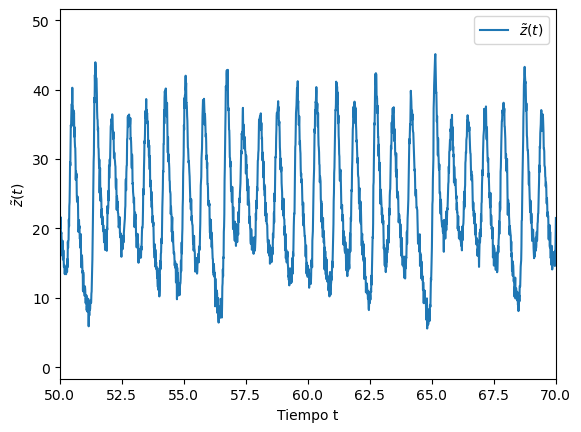

In [13]:
# 4.1)

t = t4
z_tilde = z4 + 1.0*np.random.normal(size=len(z4))

plt.plot(t, z_tilde, label=r'$\tilde{z}(t)$')
plt.xlim(50, 70)
plt.xlabel('Tiempo t')
plt.ylabel(r'$\tilde{z}(t)$')
plt.legend()
plt.show()

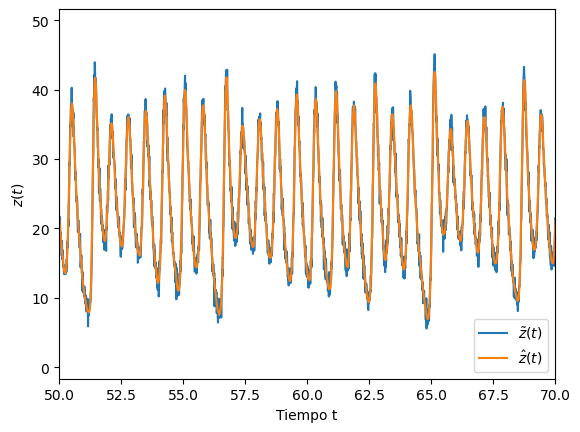

In [59]:
# 4.2)

z_hat = savgol_filter(z_tilde, window_length=25, polyorder=3)

plt.plot(t, z_tilde, label=r'$\tilde{z}(t)$')
plt.plot(t, z_hat, label=r'$\hat{z}(t)$') #, color='tomato')
plt.xlim(50, 70)
plt.xlabel('Tiempo t')
plt.ylabel('$z (t)$')
plt.legend()
plt.show()


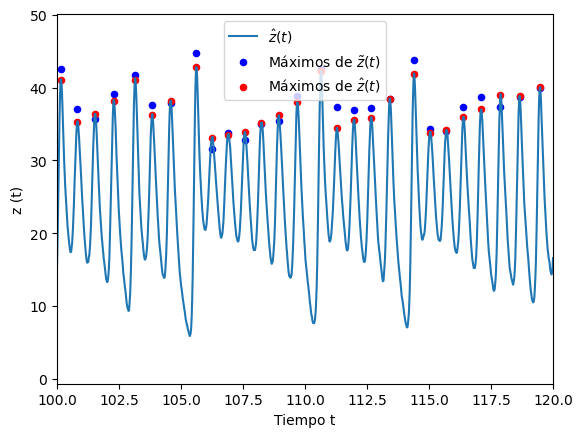

In [60]:
# 4.3)

maximos_hat, _ = find_peaks(z_hat)

plt.plot(t, z_hat, label=r'$\hat{z}(t)$') 
plt.scatter(t[maximos], z_tilde[maximos], s=20, color='blue', label=r'Máximos de $\tilde{z}(t)$')  
plt.scatter(t[maximos], z_hat[maximos], s=20, color='red', label=r'Máximos de $\hat{z}(t)$')  
plt.xlim(100, 120)
plt.xlabel('Tiempo t')
plt.ylabel('z (t)')
plt.legend()
plt.show()

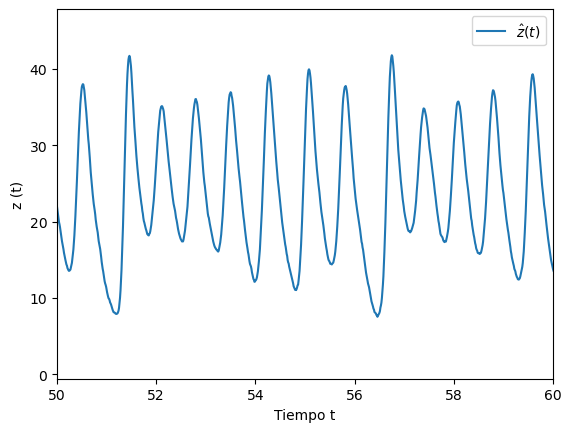

In [61]:
# 4.4)

plt.plot(t, z_hat, label=r'$\hat{z}(t)$') 
plt.xlim(50, 60)
plt.xlabel('Tiempo t')
plt.ylabel('z (t)')
plt.legend()
plt.show()

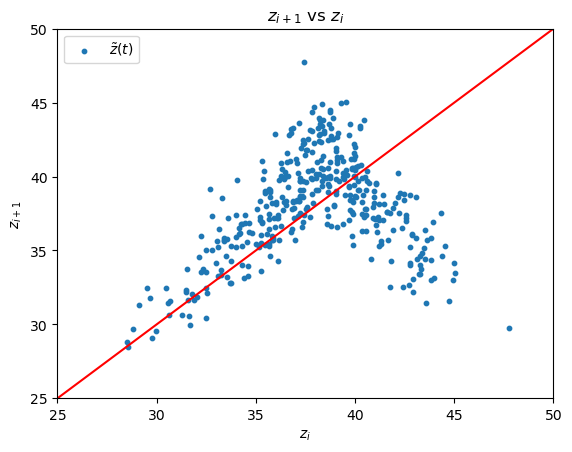

In [62]:
# 4.5)

z_tilde_max = z_tilde[maximos]

z_tilde_i = z_tilde_max[:-1]
z_tilde_i_1 = z_tilde_max[1:]

plt.scatter(z_tilde_i, z_tilde_i_1, label=r'$\tilde{z}(t)$', s=10, linestyle='-')
plt.title('$z_{i+1}$ vs $z_i$')
plt.xlabel('$z_i$')
plt.ylabel('$z_{i+1}$')
plt.plot([0,50], [0,50], c='r')
plt.xlim(25,50)
plt.ylim(25,50)
plt.legend()
plt.show()

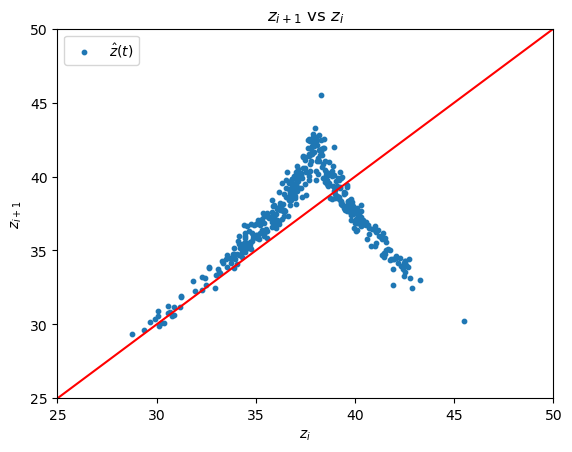

In [63]:
# 4.6)

z_hat_max = z_hat[maximos]

z_hat_i = z_hat_max[:-1]
z_hat_i_1 = z_hat_max[1:]

plt.scatter(z_hat_i, z_hat_i_1, label=r'$\hat{z}(t)$', s=10, linestyle='-')
plt.title('$z_{i+1}$ vs $z_i$')
plt.xlabel('$z_i$')
plt.ylabel('$z_{i+1}$')
plt.plot([0,50], [0,50], c='r')
plt.xlim(25,50)
plt.ylim(25,50)
plt.legend()
plt.show()

In [64]:
# 4.7) 


Se ve que